<a href="https://colab.research.google.com/github/cperiya/FacadePatternDemo/blob/main/Assignment2bDataset1_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#      Assignment 2a: Supervised Learning (ANN)
Dataset1: Breast Cancer

In [ ]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import keras
import tensorflow
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#load the data from csv file
data = pd.read_csv("BreastCancerData")
data.shape

(6259, 32)

In [ ]:
#get the datatype of each field
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6259 non-null   int64  
 1   diagnosis                6259 non-null   object 
 2   radius_mean              6259 non-null   float64
 3   texture_mean             6259 non-null   float64
 4   perimeter_mean           6259 non-null   float64
 5   area_mean                6259 non-null   float64
 6   smoothness_mean          6259 non-null   float64
 7   compactness_mean         6259 non-null   float64
 8   concavity_mean           6259 non-null   float64
 9   concave points_mean      6259 non-null   float64
 10  symmetry_mean            6259 non-null   float64
 11  fractal_dimension_mean   6259 non-null   float64
 12  radius_se                6259 non-null   float64
 13  texture_se               6259 non-null   float64
 14  perimeter_se            

In [ ]:
#check if null values are present
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [ ]:
#since the last column has no data and has null values, drop the column
data.dropna(axis =1, inplace=True)
data.shape

(6259, 32)

In [ ]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  6.259000e+03  6259.000000   6259.000000     6259.000000  6259.000000   
mean   2.847981e+06    14.127292     19.289649       91.969033   654.889104   
std    3.865773e+07     3.521232      4.297598       24.279559   351.632845   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    9.427550e+04    11.700000     16.170000       75.170000   420.300000   
50%    9.584000e+04    13.370000     18.840000       86.240000   551.100000   
75%    9.740450e+04    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count      6259.000000       6259.000000     6259.000000          6259.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014053          0.052771        0.079656             0.038772   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count    6259.000000  ...   6259.000000    6259.000000      6259.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027392  ...      4.829378       6.141345        33.575684   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count  6259.000000       6259.000000        6259.000000      6259.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     568.901907          0.022814           0.157211         0.208458   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count           6259.000000     6259.000000              6259.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065680        0.061818                 0.018047  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

Data Preprocessing

In [ ]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

## Identify Categorical Variables

In [ ]:
# as we have only one categorical column, lets find its unique values
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

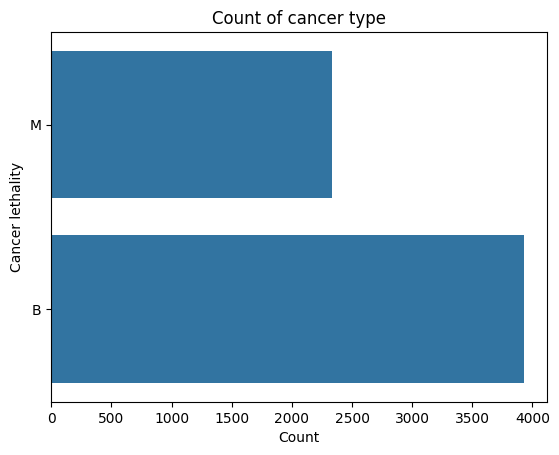

In [ ]:
#plt.hist(data['diagnosis'])
plt.title('Count of cancer type')
sns.countplot(data['diagnosis'])
plt.ylabel('Cancer lethality')
plt.xlabel('Count')
plt.show()

In [ ]:
#find correlation
#data.diagnosis = data.diagnosis.apply(lambda val:1 if val=='M' else 0)
#data


Plotting Correlation Heatmap

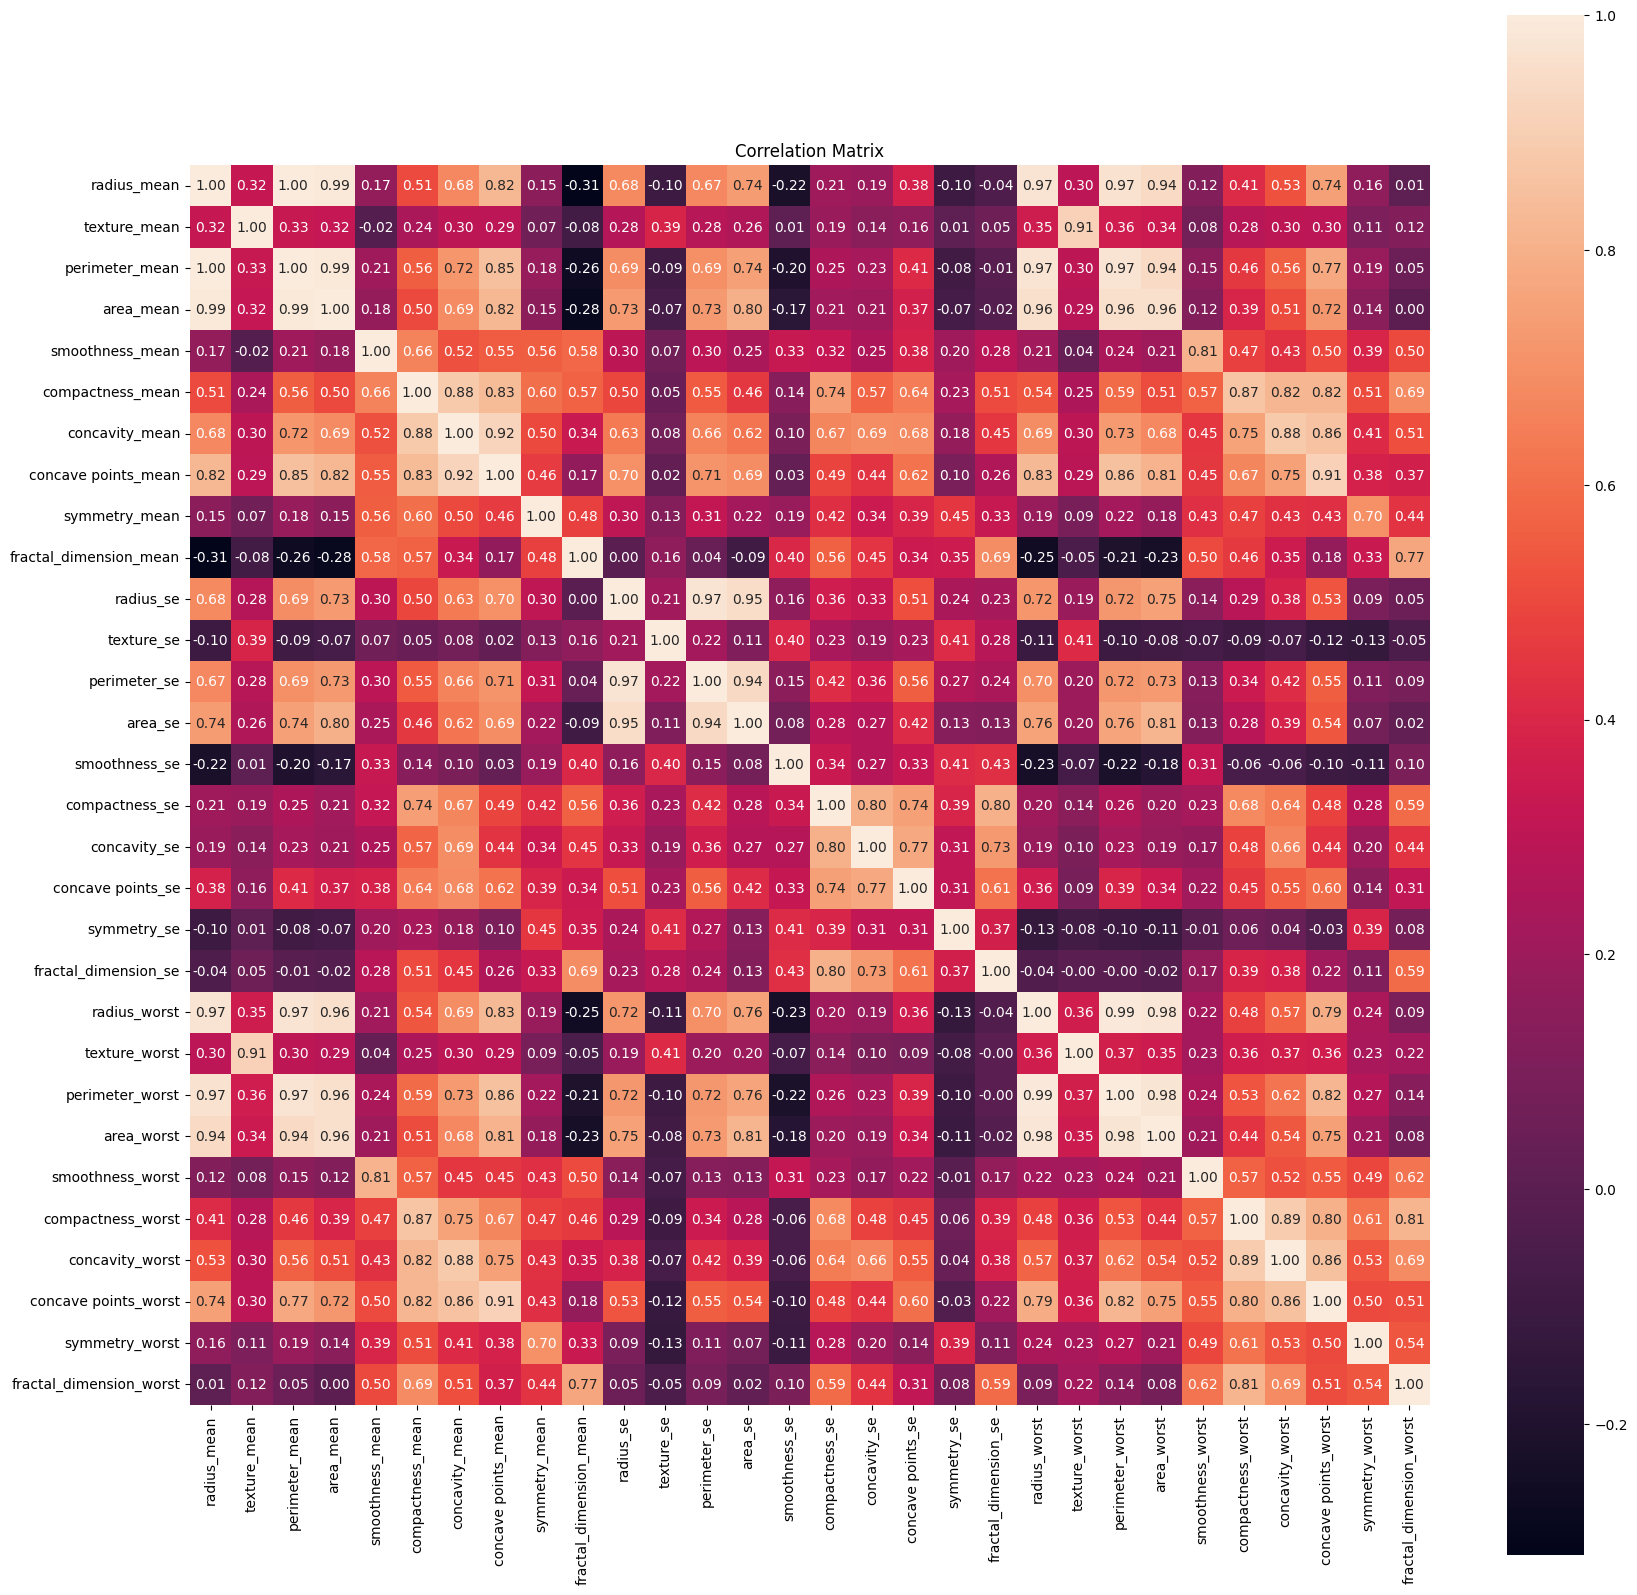

In [ ]:
plt.figure(figsize = (20,20))
corr_mtrx = data.iloc[:,2:].corr()
sns.heatmap(corr_mtrx, annot=True, square=True, fmt = '.2f' )
plt.title('Correlation Matrix')
plt.show()

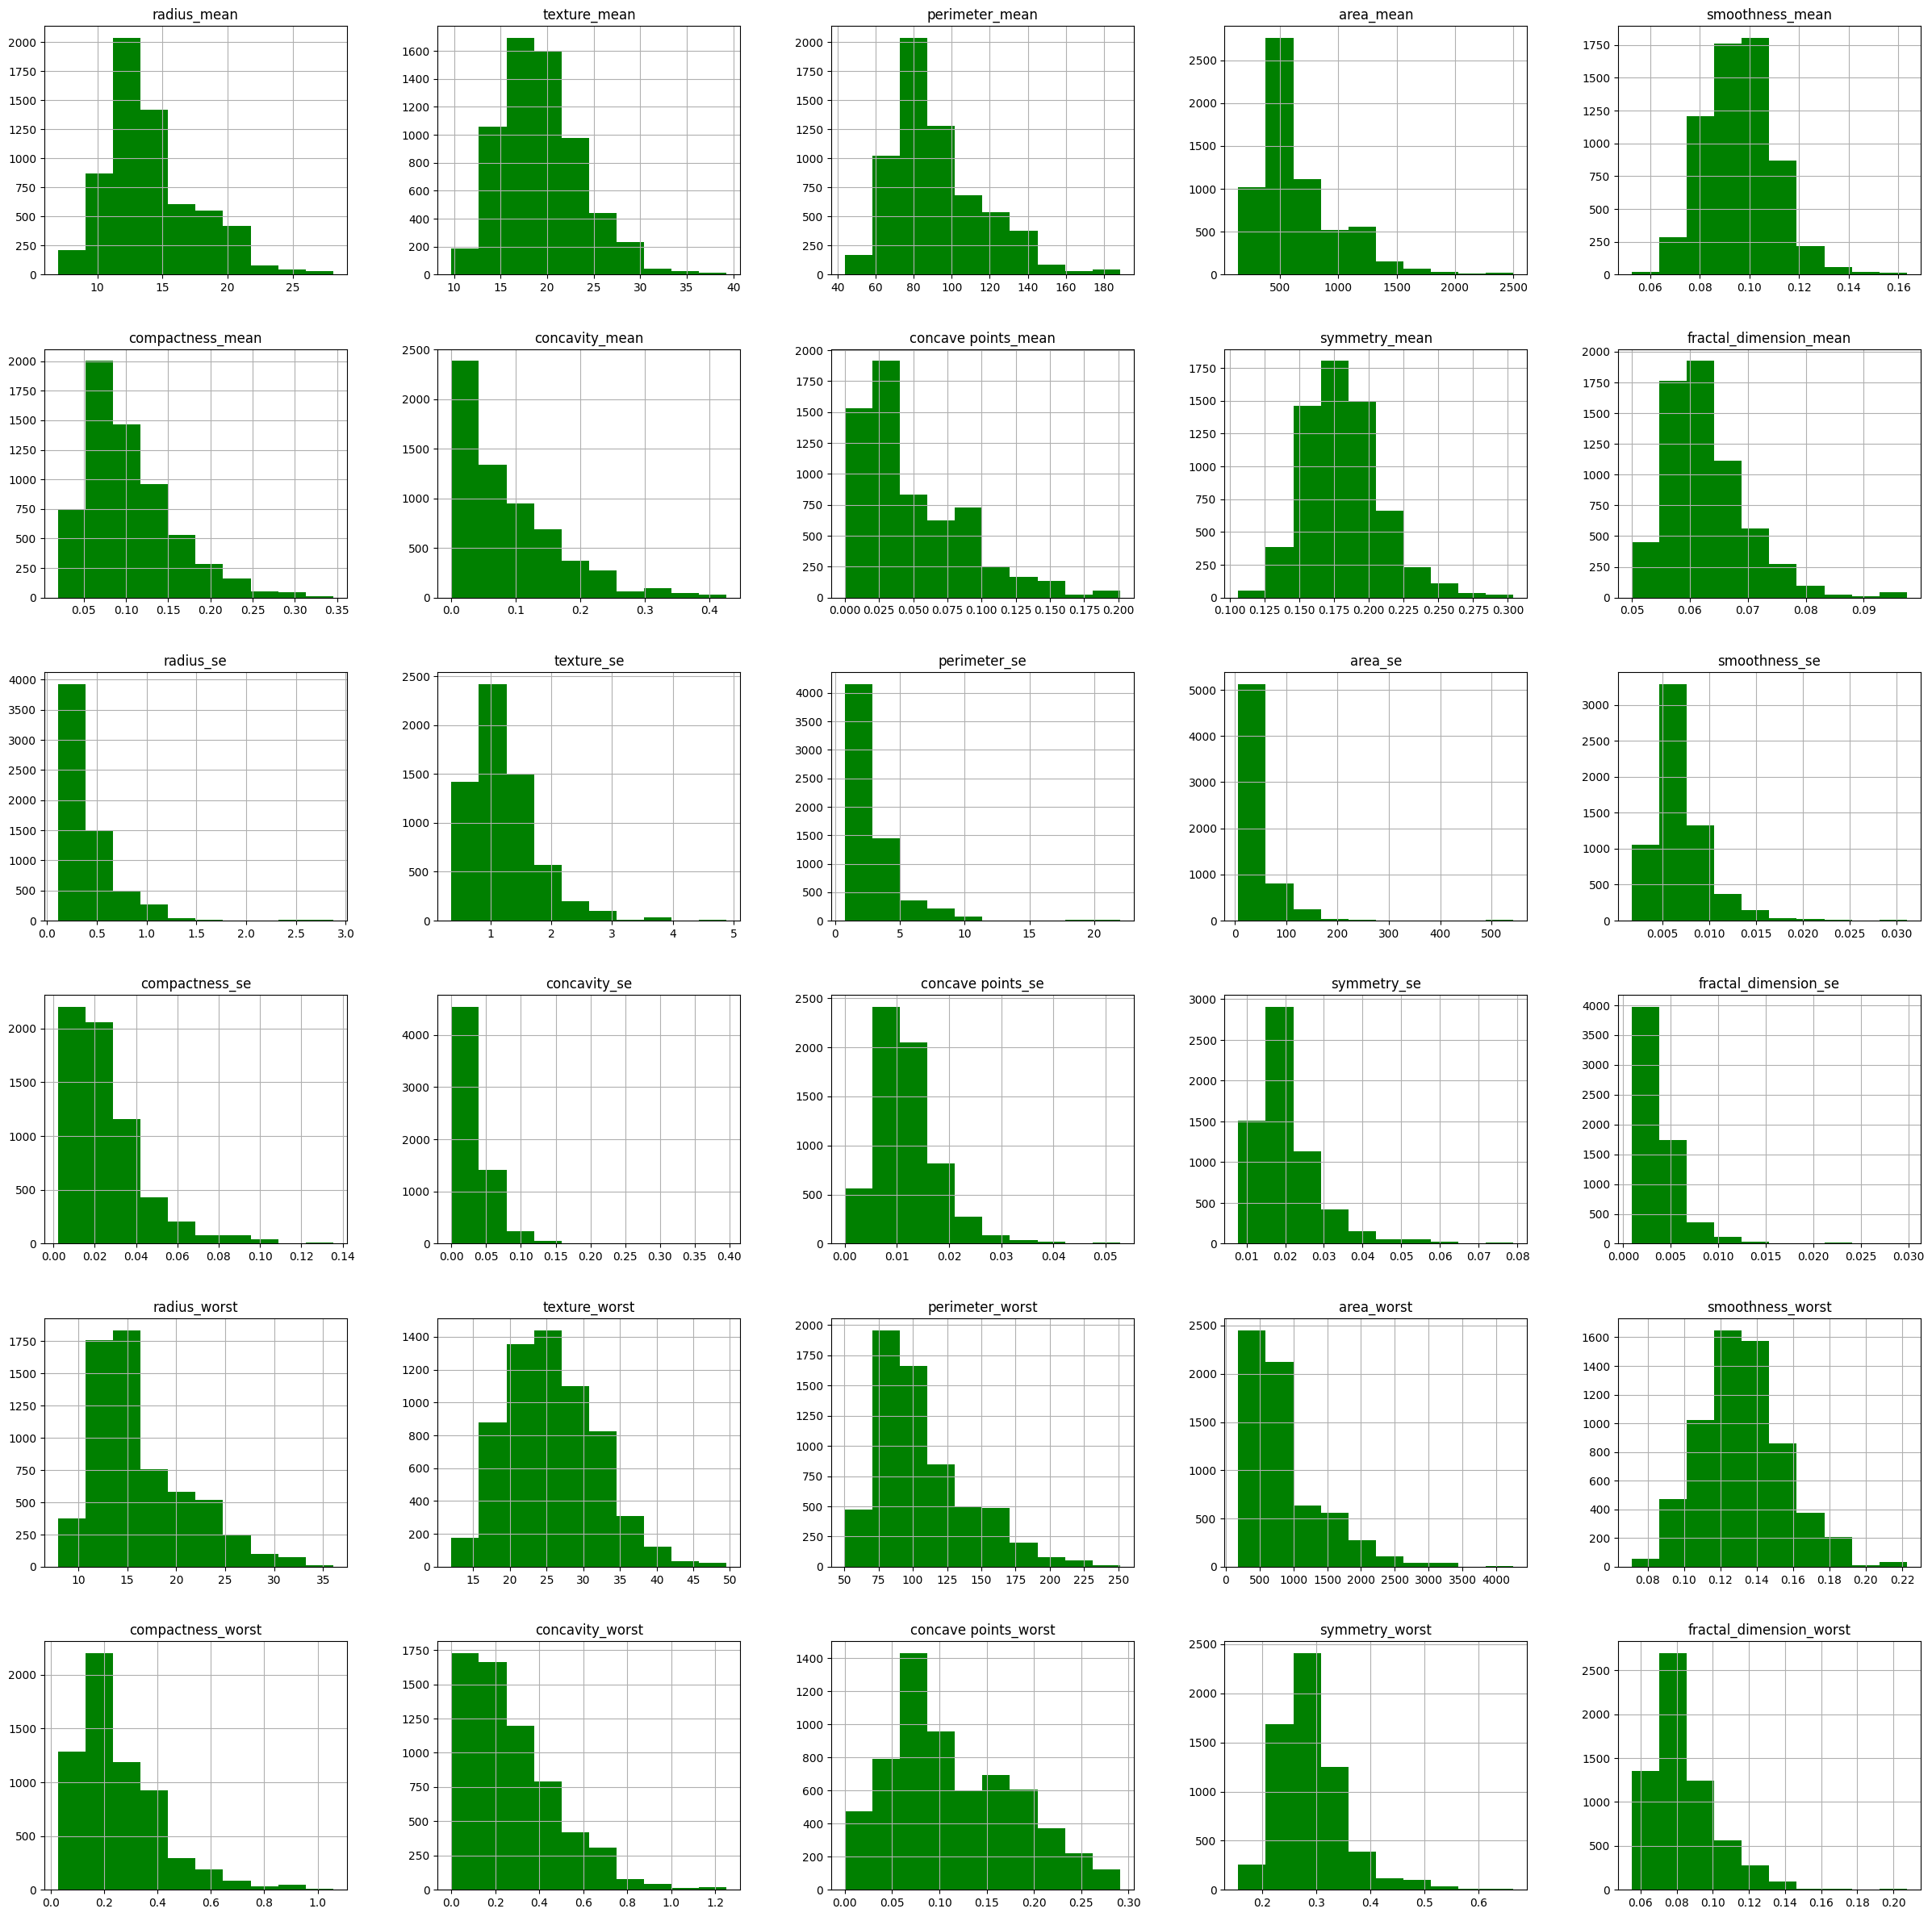

In [ ]:
#plot histogram excluding id and diagnosis
data.iloc[:,2:].hist(figsize = (30,30), color = 'green')
plt.show()

In [ ]:
#find columns that are highly correlated and remove before classification
corr_mat_abs = data.iloc[:,2:].corr().abs()
upper = corr_mat_abs.where(np.triu(np.ones(corr_mat_abs.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("columns dropped:",to_drop)
data = data.drop(to_drop,axis = 1)
data

columns dropped: ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


id diagnosis  radius_mean  texture_mean  smoothness_mean  \
0       842302         M        17.99         10.38          0.11840   
1       842517         M        20.57         17.77          0.08474   
2     84300903         M        19.69         21.25          0.10960   
3     84348301         M        11.42         20.38          0.14250   
4     84358402         M        20.29         14.34          0.10030   
...        ...       ...          ...           ...              ...   
6254     98437         M        21.56         22.39          0.11100   
6255     98438         M        20.13         28.25          0.09780   
6256     98439         M        16.60         28.08          0.08455   
6257     98440         M        20.60         29.33          0.11780   
6258     98441         B         7.76         24.54          0.05263   

      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0              0.27760         0.30010              0.14710         0.2419   
1              0.07864         0.08690              0.07017         0.1812   
2              0.15990         0.19740              0.12790         0.2069   
3              0.28390         0.24140              0.10520         0.2597   
4              0.13280         0.19800              0.10430         0.1809   
...                ...             ...                  ...            ...   
6254           0.11590         0.24390              0.13890         0.1726   
6255           0.10340         0.14400              0.09791         0.1752   
6256           0.10230         0.09251              0.05302         0.1590   
6257           0.27700         0.35140              0.15200         0.2397   
6258           0.04362         0.00000              0.00000         0.1587   

      fractal_dimension_mean  ...  concave points_se  symmetry_se  \
0                    0.07871  ...            0.01587      0.03003   
1                    0.05667  ...            0.01340      0.01389   
2                    0.05999  ...            0.02058      0.02250   
3                    0.09744  ...            0.01867      0.05963   
4                    0.05883  ...            0.01885      0.01756   
...                      ...  ...                ...          ...   
6254                 0.05623  ...            0.02454      0.01114   
6255                 0.05533  ...            0.01678      0.01898   
6256                 0.05648  ...            0.01557      0.01318   
6257                 0.07016  ...            0.01664      0.02324   
6258                 0.05884  ...            0.00000      0.02676   

      fractal_dimension_se  texture_worst  smoothness_worst  \
0                 0.006193          17.33           0.16220   
1                 0.003532          23.41           0.12380   
2                 0.004571          25.53           0.14440   
3                 0.009208          26.50           0.20980   
4                 0.005115          16.67           0.13740   
...                    ...            ...               ...   
6254              0.004239          26.40           0.14100   
6255              0.002498          38.25           0.11660   
6256              0.003892          34.12           0.11390   
6257              0.006185          39.42           0.16500   
6258              0.002783          30.37           0.08996   

      compactness_worst  concavity_worst  concave points_worst  \
0               0.66560           0.7119                0.2654   
1               0.18660           0.2416                0.1860   
2               0.42450           0.4504                0.2430   
3               0.86630           0.6869                0.2575   
4               0.20500           0.4000                0.1625   
...                 ...              ...                   ...   
6254            0.21130           0.4107                0.2216   
6255            0.19220           0.3215                0.1628   
6256            0.30940       

In [ ]:
#drop id
data.drop(columns=['id'], inplace = True)

 Box plot for detecting outliers

In [ ]:
X = data.drop(columns=['diagnosis'])
y = data.diagnosis

In [ ]:
# Before plotting the heatmap again, let's encode the 'Hazardous' column to numeric value
ohe = OneHotEncoder(sparse= False)
transformed = pd.DataFrame(ohe.fit_transform(data[['diagnosis']]), columns=ohe.get_feature_names_out())
data = pd.concat([data, transformed], axis=1)
data.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0         M        17.99         10.38          0.11840           0.27760   
1         M        20.57         17.77          0.08474           0.07864   
2         M        19.69         21.25          0.10960           0.15990   
3         M        11.42         20.38          0.14250           0.28390   
4         M        20.29         14.34          0.10030           0.13280   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0          0.3001              0.14710         0.2419                 0.07871   
1          0.0869              0.07017         0.1812                 0.05667   
2          0.1974              0.12790         0.2069                 0.05999   
3          0.2414              0.10520         0.2597                 0.09744   
4          0.1980              0.10430         0.1809                 0.05883   

   radius_se  ...  fractal_dimension_se  texture_worst  smoothness_worst  \
0     1.0950  ...              0.006193          17.33            0.1622   
1     0.5435  ...              0.003532          23.41            0.1238   
2     0.7456  ...              0.004571          25.53            0.1444   
3     0.4956  ...              0.009208          26.50            0.2098   
4     0.7572  ...              0.005115          16.67            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  diagnosis_B  diagnosis_M  
0                  0.11890          0.0          1.0  
1                  0.08902          0.0          1.0  
2                  0.08758          0.0          1.0  
3                  0.17300          0.0          1.0  
4                  0.07678          0.0          1.0  

[5 rows x 26 columns]

In [ ]:
#y = y.map({'M': 1, 'B': 0})

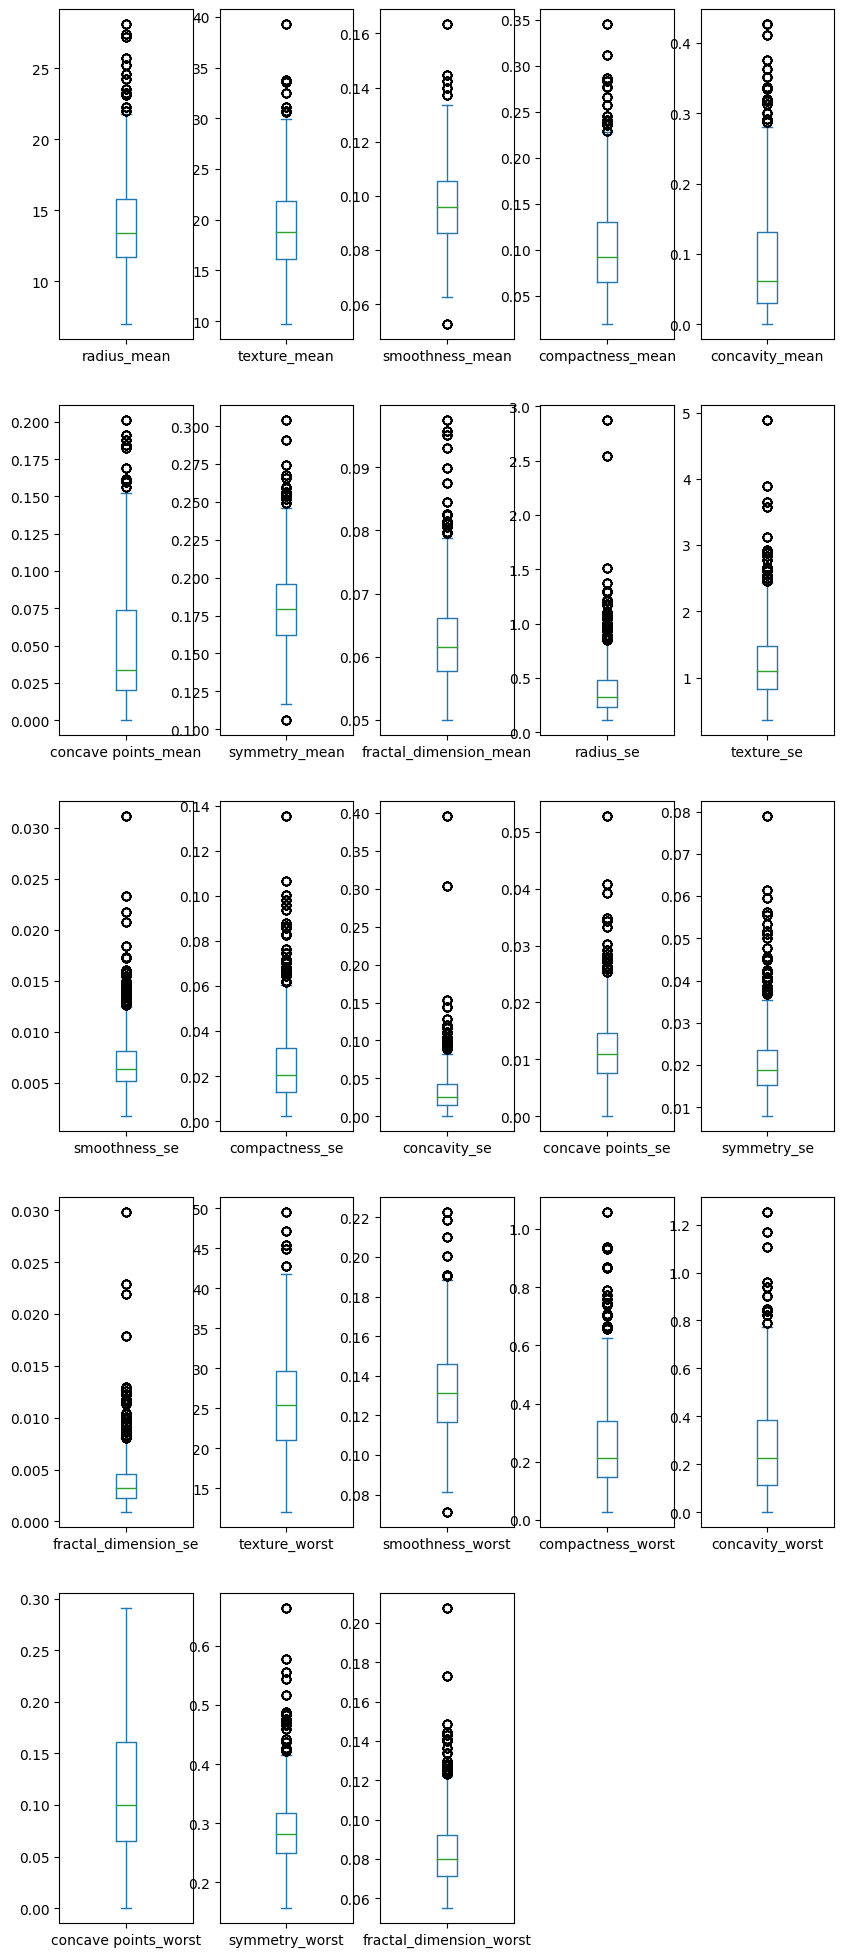

In [ ]:
_ = X.plot(kind='box', subplots=True, layout=(6,5), sharex=False, figsize=(10, 30))

In [ ]:
#generate a scatter plot for outliers

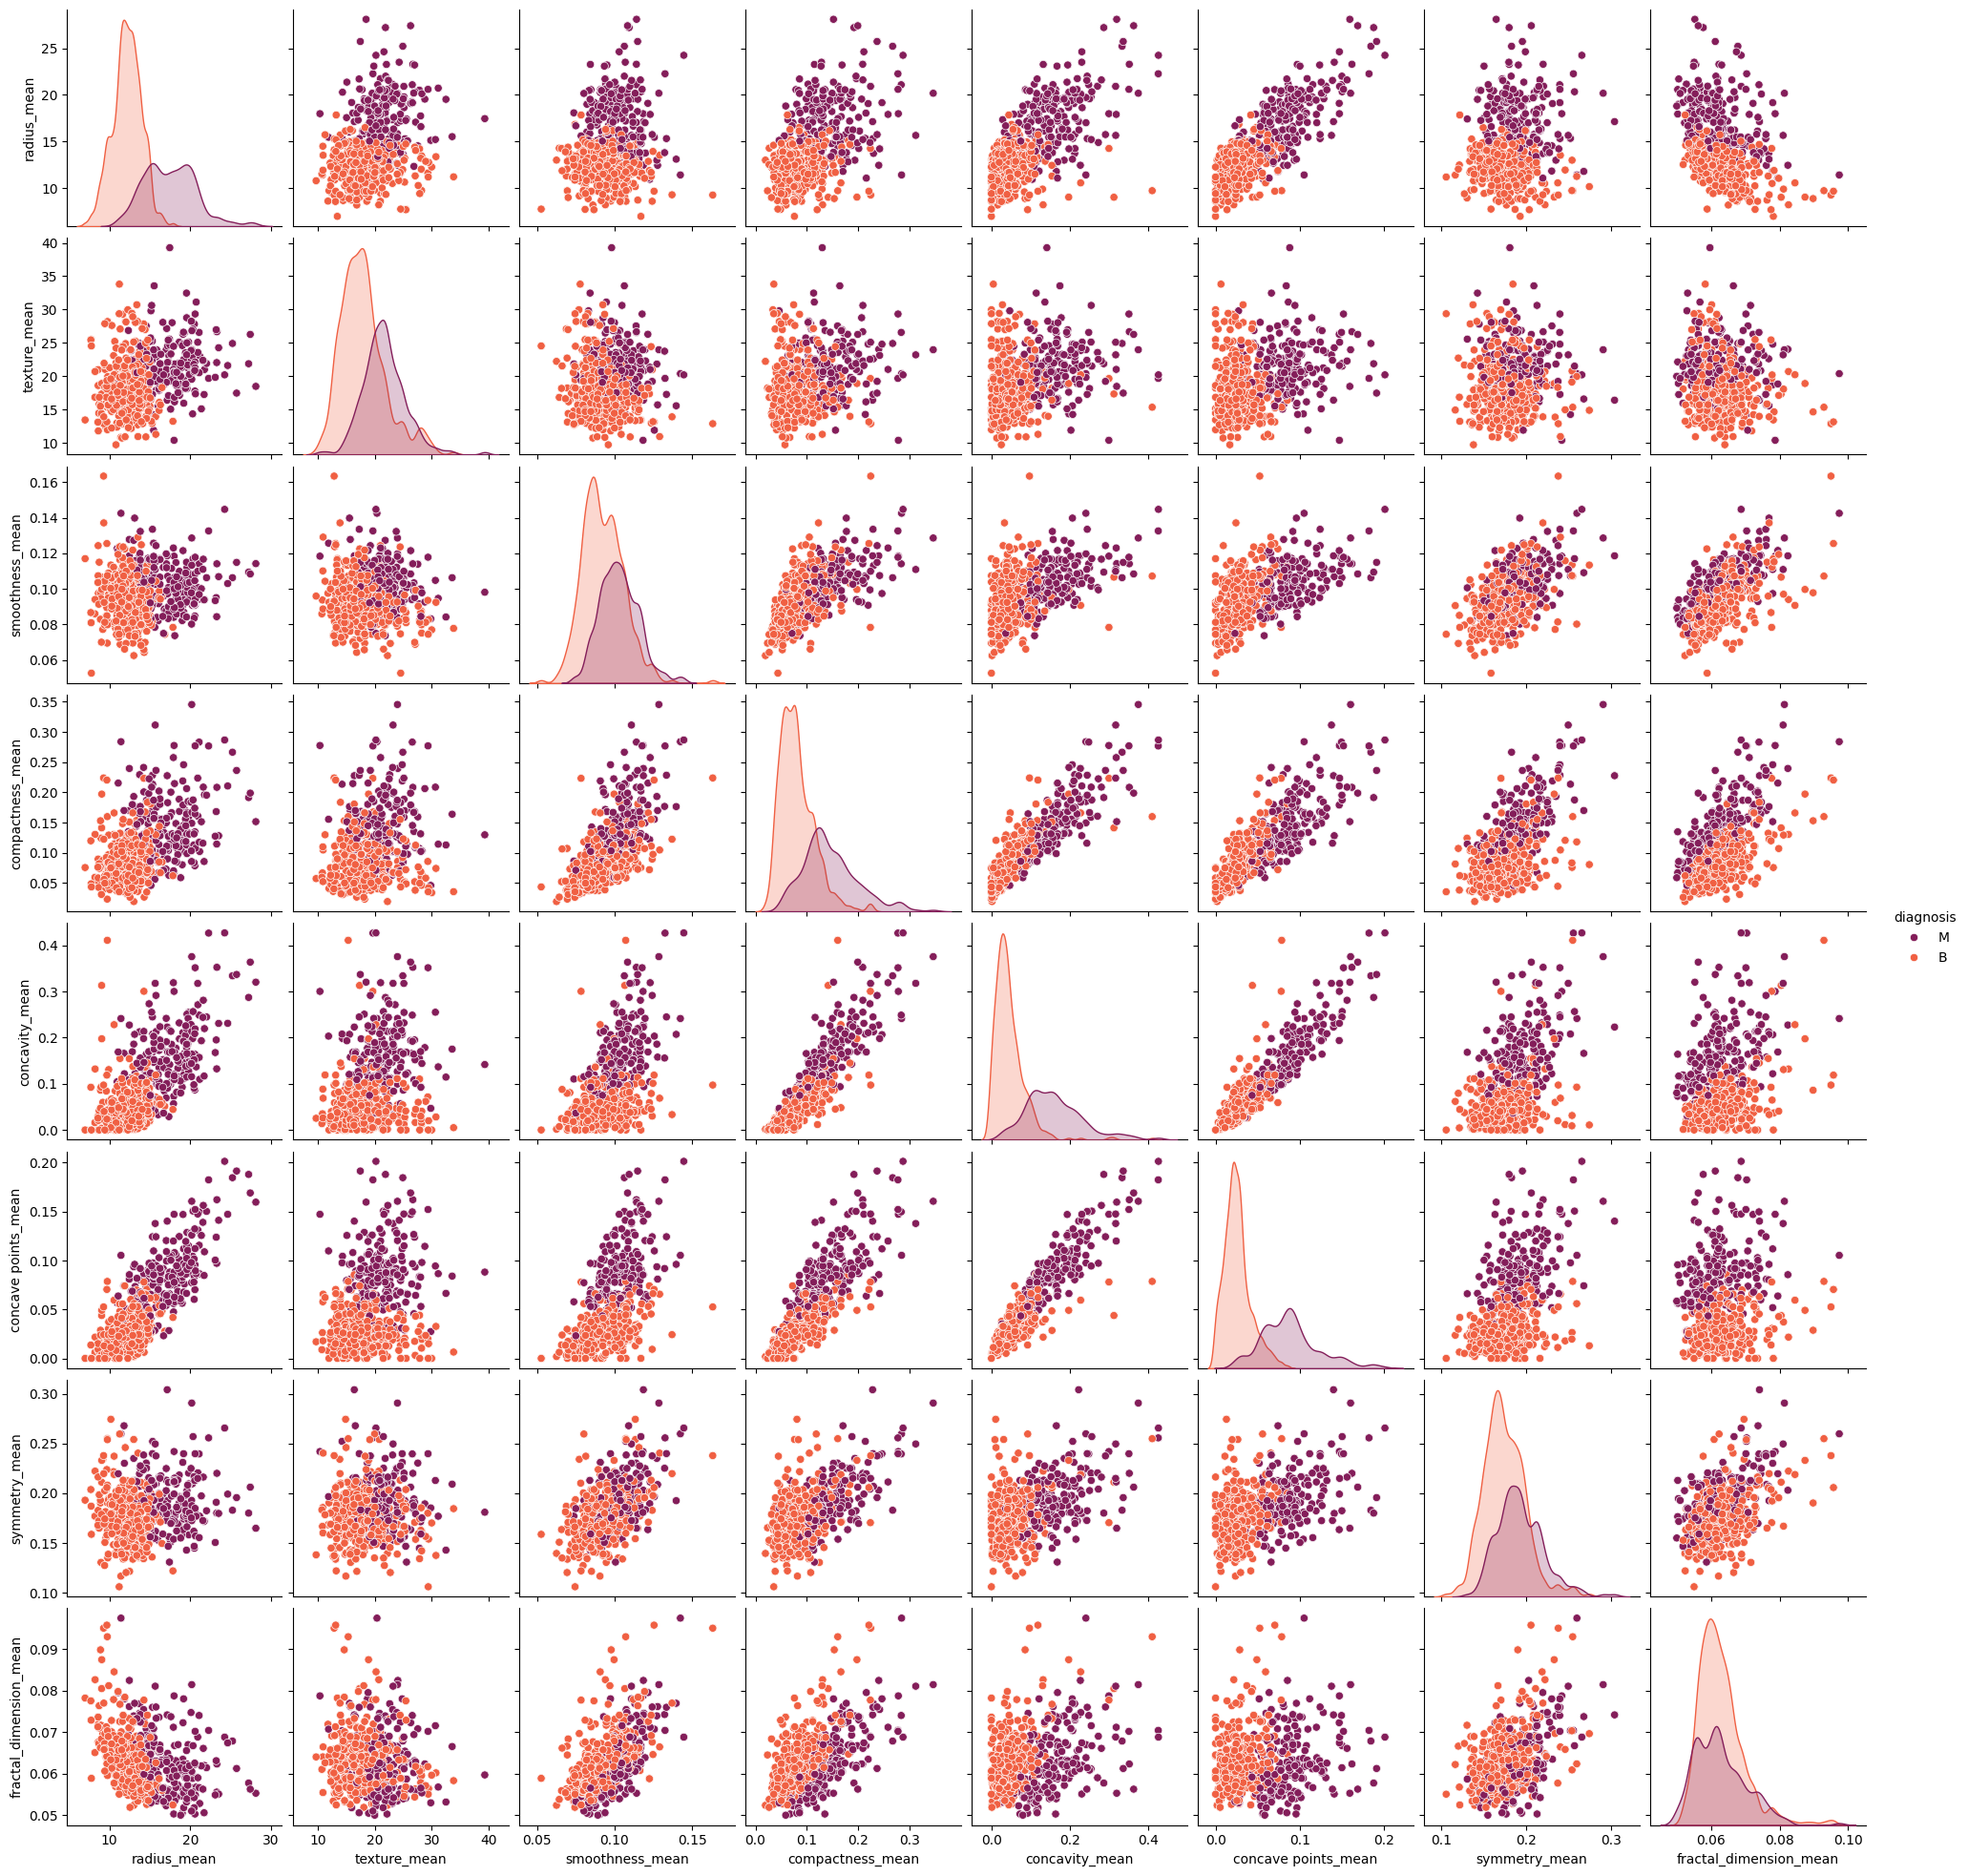

In [ ]:
columns = ['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(data=data[columns], hue="diagnosis", palette='rocket')

In [ ]:
# Remove outliers (using IQR method)
def remove_outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_End = Q1 - 1.5*IQR
    upper_End = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower_End, upper_End)
    return df

def remove_outliers_all(df, col_list):
    for c in col_list:
        df = remove_outliers(df,c)
    return df

In [ ]:
numerical_col = X.select_dtypes(include=np.number).columns.tolist()
X = remove_outliers_all(X,numerical_col)

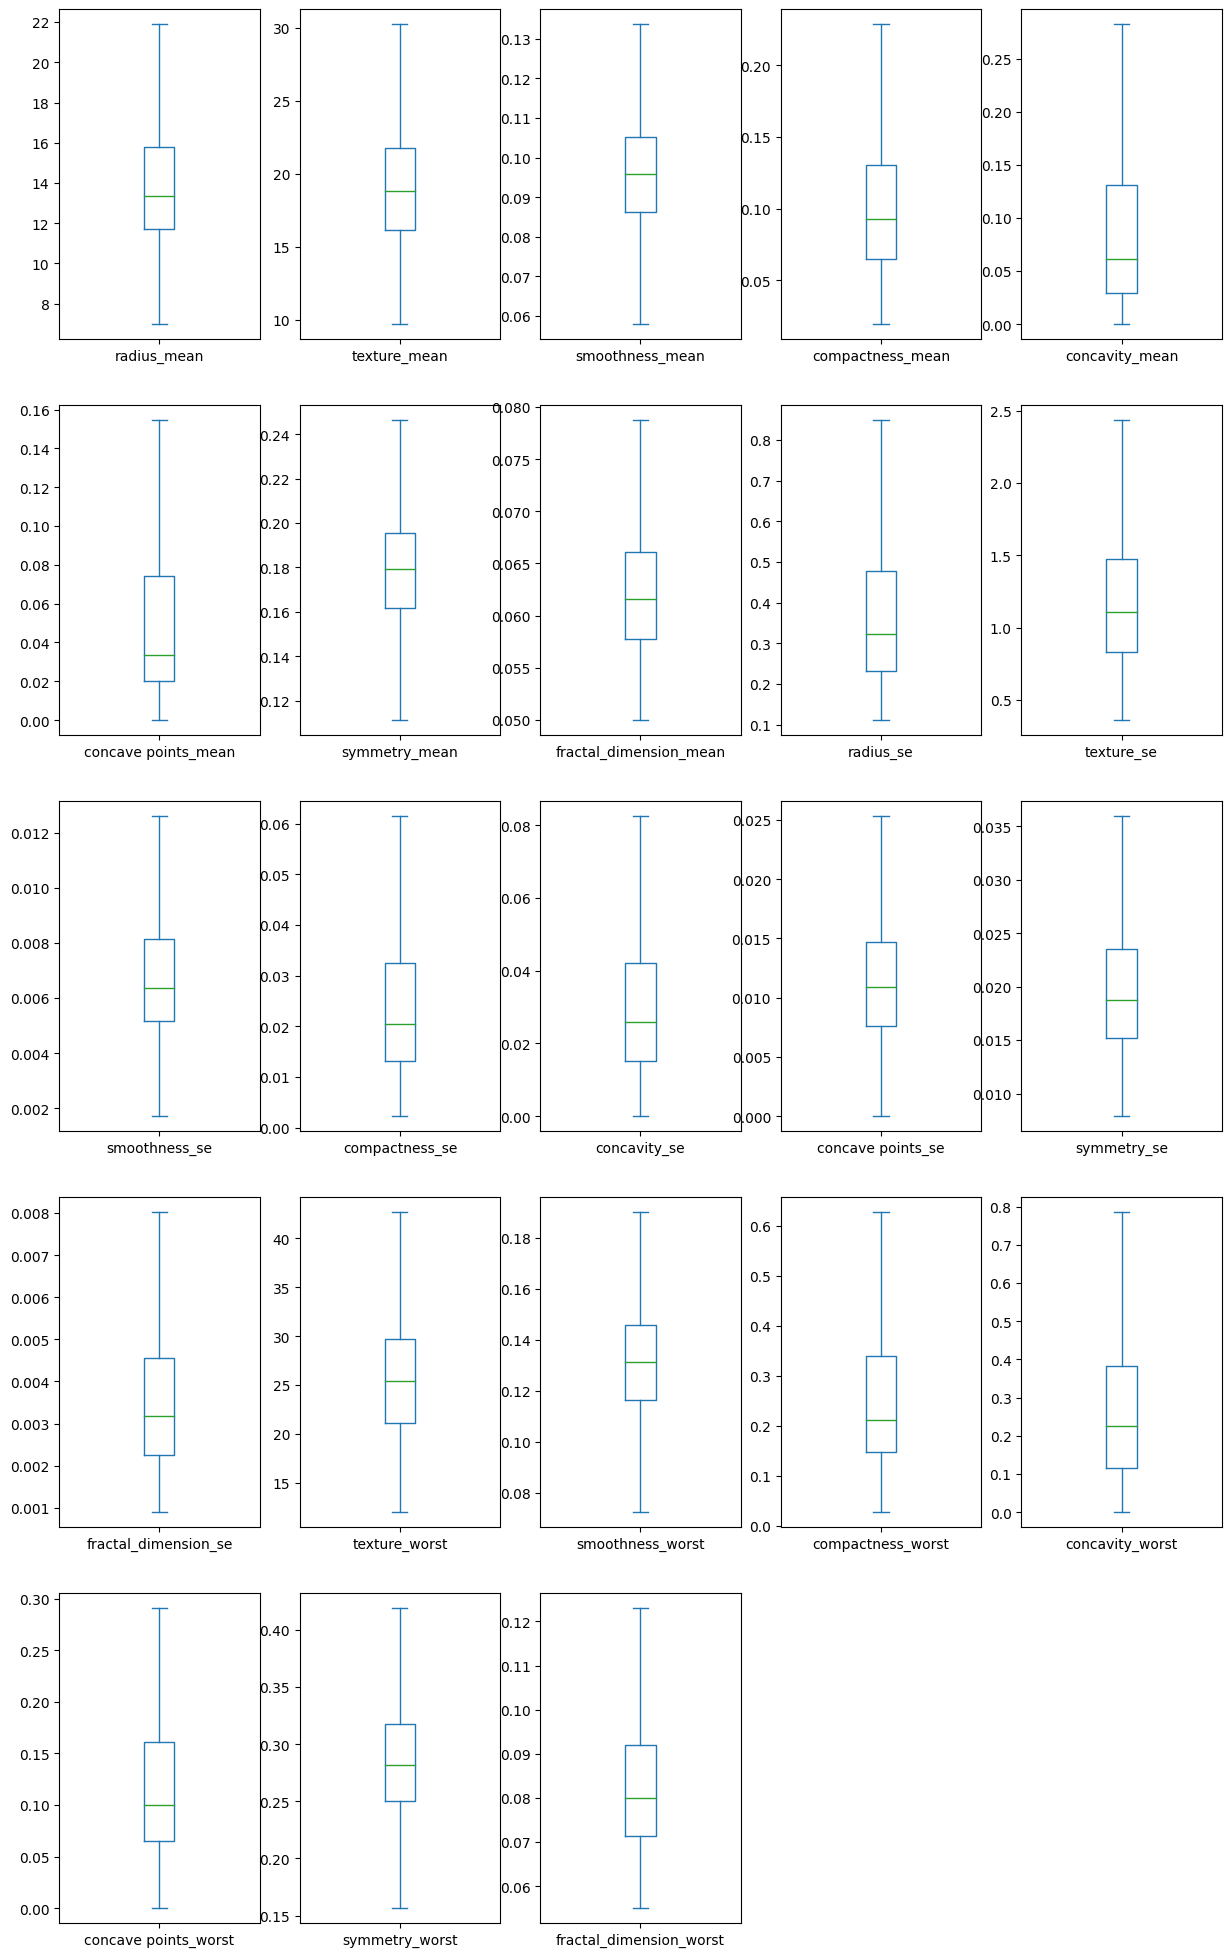

In [ ]:
_ = X.plot(kind='box', subplots=True, layout=(6,5), sharex=False, figsize=(15, 30))

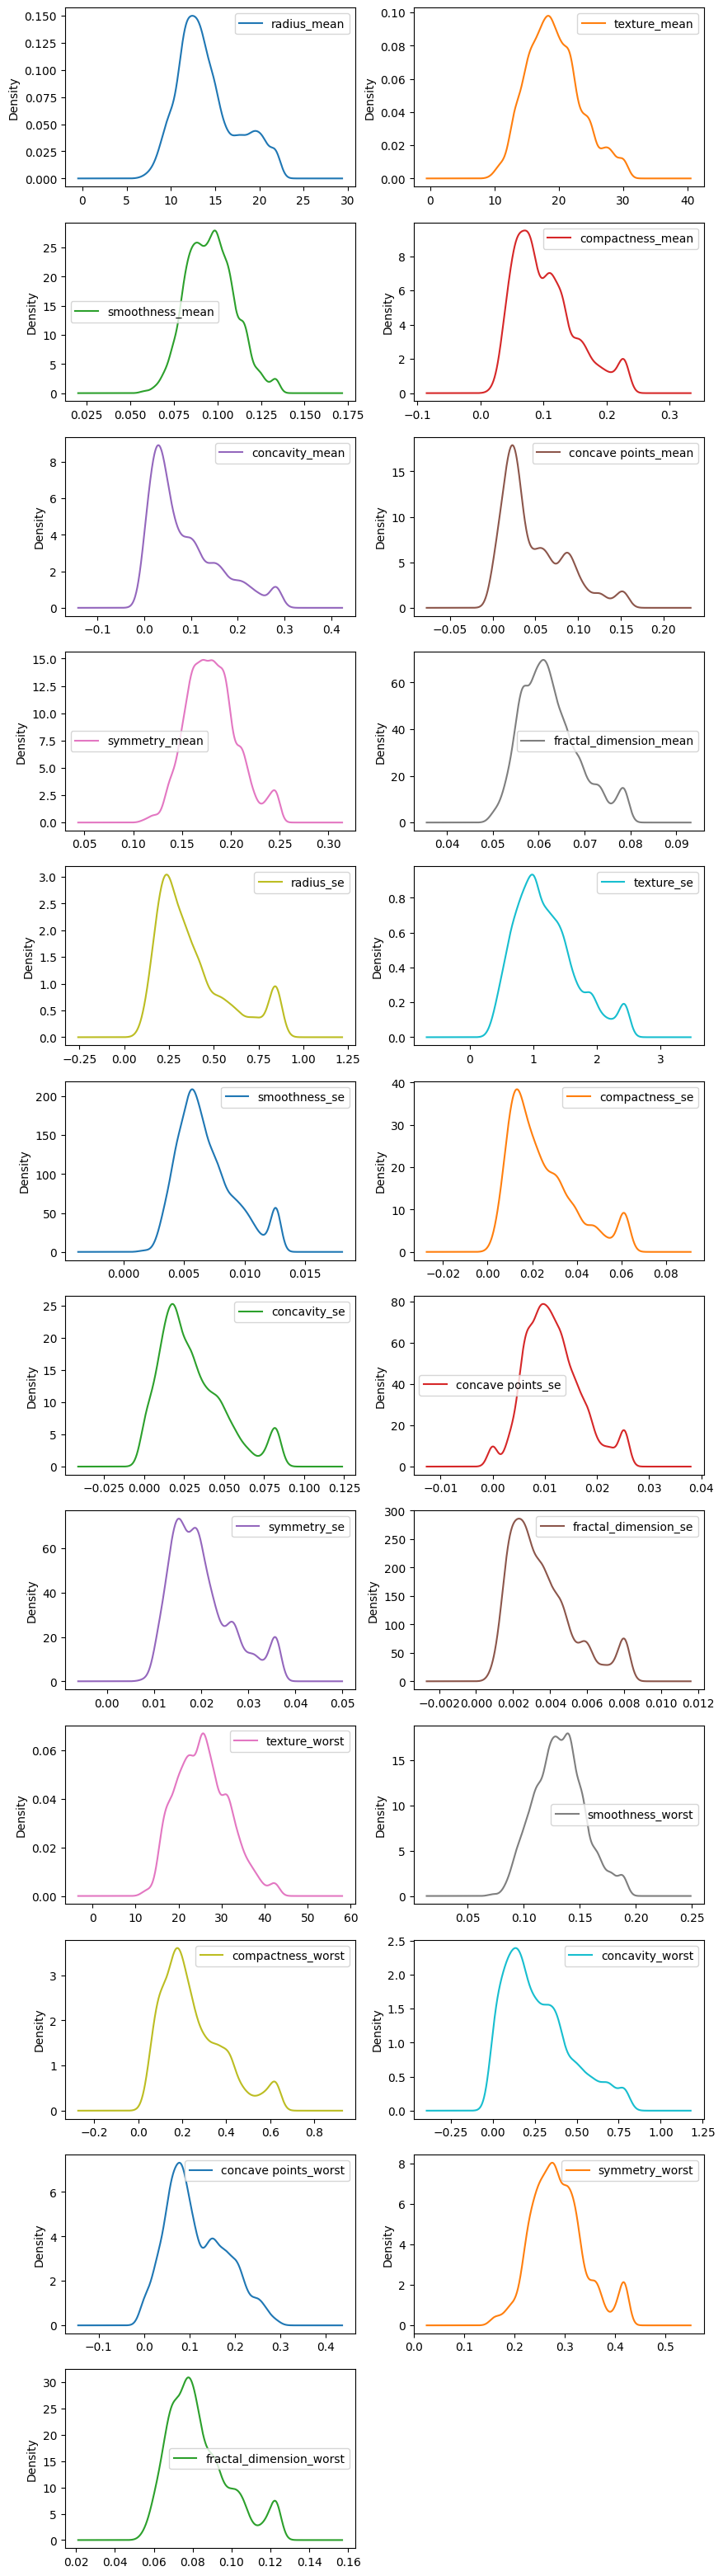

In [ ]:
_ = X[numerical_col].plot(kind='density', subplots=True, layout=(12, 2), sharex=False, figsize=(10, 40))

In [ ]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
skewness = data[numerical_features].skew().sort_values(ascending=False)

print("Skewness of Numerical Features:")
print(skewness)

Skewness of Numerical Features:
concavity_se               5.098203
fractal_dimension_se       3.914555
radius_se                  3.081202
smoothness_se              2.308898
symmetry_se                2.189867
compactness_se             1.897657
fractal_dimension_worst    1.658591
texture_se                 1.642494
compactness_worst          1.470020
concave points_se          1.441212
symmetry_worst             1.430488
concavity_mean             1.397818
fractal_dimension_mean     1.301359
compactness_mean           1.187268
concave points_mean        1.168370
concavity_worst            1.147477
radius_mean                0.940119
symmetry_mean              0.723868
texture_mean               0.648889
diagnosis_M                0.527194
texture_worst              0.497126
concave points_worst       0.491434
smoothness_mean            0.455229
smoothness_worst           0.414429
diagnosis_B               -0.527194
dtype: float64


In [ ]:
for feature in skewness[skewness > 1].index:
    if (data[feature] > 0).all():  # Apply only if all values are positive
        data[feature] = np.log1p(data[feature])

In [ ]:
for feature in skewness[(skewness > 0.5) & (skewness <= 1)].index:
    data[feature] = np.sqrt(data[feature])

check skewness

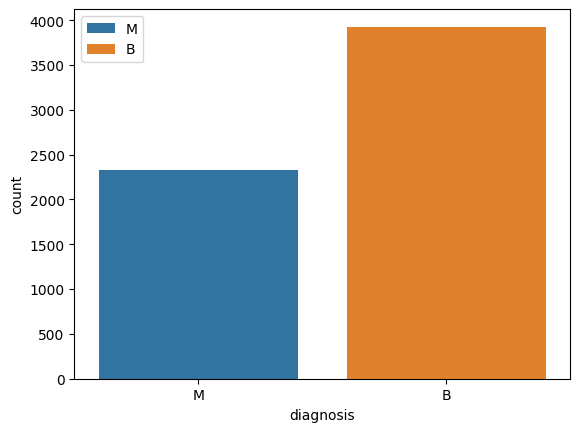

In [ ]:
sns.countplot(data=data, x='diagnosis', hue='diagnosis')
plt.legend(labels=['M','B'])

resolve class imbalance - smote

In [ ]:

smt = SMOTE()
X_res, y_res = smt.fit_resample(X[X.select_dtypes(include=np.number).columns.tolist()],y)

In [ ]:
X_res.shape

(7854, 23)

In [ ]:
y_res.shape

(7854,)

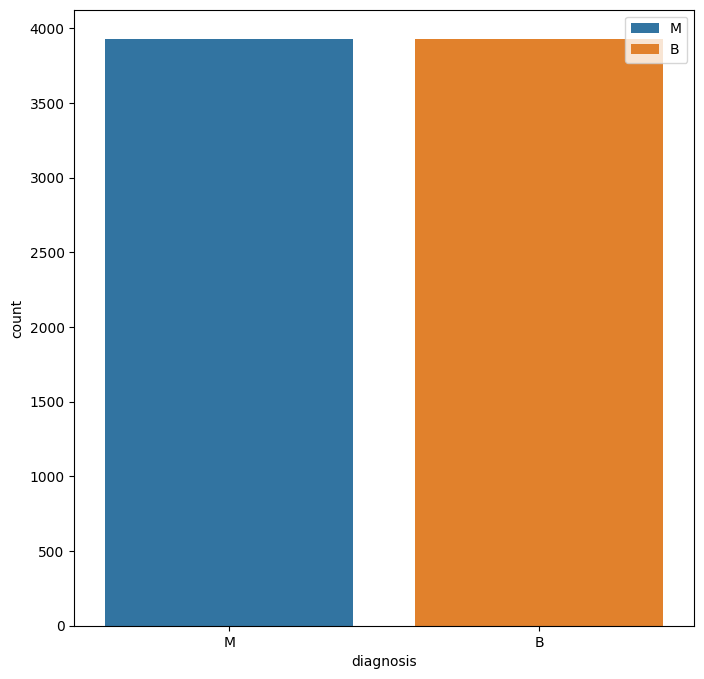

In [ ]:
temp = pd.concat([X_res, y_res], axis=1)
plt.figure(figsize=(8, 8))
sns.countplot(data=temp, x='diagnosis', hue='diagnosis')
plt.legend(labels=['M', 'B'], loc='upper right')

### Split into train and test Data

In [ ]:

# Preparing X & y variabls
#X = data.drop(columns=['diagnosis'], axis = 1)
#y = data.diagnosis

In [ ]:
y_res

0       M
1       M
2       M
3       M
4       M
       ..
7849    M
7850    M
7851    M
7852    M
7853    M
Name: diagnosis, Length: 7854, dtype: object

In [ ]:
#label encoding

lb = LabelEncoder()
#y = lb.fit_transform(y)
y = lb.fit_transform(y_res)

In [ ]:
y.shape

(7854,)

In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:

#X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=42)

#Transformation- standard scalar

In [ ]:
# scaling features
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:

scalar = StandardScaler()
normalized_features = scalar.fit_transform(X_res)
X_train, X_test, y_train ,y_test =train_test_split(X_res,y_res, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(6283, 23)

In [ ]:
X_train

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
4657        13.11         15.56         0.133695           0.17650   
432         20.18         19.54         0.113300           0.14890   
6000        11.70         19.11         0.088140           0.05253   
6307        14.90         22.53         0.099470           0.22250   
2118        11.04         16.83         0.107700           0.07804   
...           ...           ...              ...               ...   
5226        13.11         15.56         0.133695           0.17650   
5390        10.71         20.39         0.108200           0.12890   
860         14.96         19.10         0.089920           0.09823   
7603        14.48         21.46         0.094440           0.09947   
7270        14.42         19.77         0.097520           0.11410   

      concavity_mean  concave points_mean  symmetry_mean  \
4657         0.20710              0.09601         0.1925   
432          0.21330              0.12590         0.1724   
6000         0.01583              0.01148         0.1936   
6307         0.27330              0.09711         0.2041   
2118         0.03046              0.02480         0.1714   
...              ...                  ...            ...   
5226         0.20710              0.09601         0.1925   
5390         0.08448              0.02867         0.1668   
860          0.05940              0.04819         0.1879   
7603         0.12040              0.04938         0.2075   
7270         0.09388              0.05839         0.1879   

      fractal_dimension_mean  radius_se  texture_se  ...  concave points_se  \
4657                 0.07692     0.3908      0.9238  ...           0.013880   
432                  0.06053     0.4331      1.0010  ...           0.019100   
6000                 0.06128     0.1601      1.4300  ...           0.007638   
6307                 0.06898     0.2530      0.8749  ...           0.022340   
2118                 0.06340     0.1967      1.3870  ...           0.007483   
...                      ...        ...         ...  ...                ...   
5226                 0.07692     0.3908      0.9238  ...           0.013880   
5390                 0.06862     0.3198      1.4890  ...           0.017450   
860                  0.05852     0.2877      0.9480  ...           0.011870   
7603                 0.05636     0.4204      2.2200  ...           0.017610   
7270                 0.06390     0.2895      1.8510  ...           0.014240   

      symmetry_se  fractal_dimension_se  texture_worst  smoothness_worst  \
4657      0.01547              0.007098          22.40            0.1862   
432       0.02451              0.004005          25.07            0.1665   
6000      0.02349              0.001661          26.55            0.1223   
6307      0.01499              0.005784          27.57            0.1419   
2118      0.01718              0.002198          26.44            0.1369   
...           ...                   ...            ...               ...   
5226      0.01547              0.007098          22.40            0.1862   
5390      0.02728              0.007610          25.21            0.1335   
860       0.01522              0.002815          26.19            0.1313   
7603      0.02418              0.003249          29.25            0.1306   
7270      0.01462              0.004452          30.86            0.1431   

      compactness_worst  concavity_worst  concave points_worst  \
4657            0.40990          0.63760               0.19860   
432             0.29420          0.53080               0.21730   
6000            0.10870          0.07915               0.05741   
6307            0.62695          0.78550               0.24750   
2118            0.14820          0.10670               0.07431   
...                 ...              ...                   ...   
5226            0.40990          0.63760               0.19860   
5390            0.25500          0.25340              

In [ ]:
y_train = lb.fit_transform(y_train)


In [ ]:
y_test = lb.fit_transform(y_test)

# Machine learning Models
### Artificial Neural Networks

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(10, activation='relu'))
ann_model.add(Dense(5, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ann_model.fit(X_train, y_train , epochs=26, batch_size=16, verbose=1, use_multiprocessing=True)

Epoch 1/26
393/393 [==============================] - 2s 2ms/step - loss: 0.6128 - accuracy: 0.6936
Epoch 2/26
393/393 [==============================] - 1s 2ms/step - loss: 0.4184 - accuracy: 0.8631
Epoch 3/26
393/393 [==============================] - 1s 2ms/step - loss: 0.2959 - accuracy: 0.9069
Epoch 4/26
393/393 [==============================] - 1s 2ms/step - loss: 0.2303 - accuracy: 0.9287
Epoch 5/26
393/393 [==============================] - 1s 2ms/step - loss: 0.1917 - accuracy: 0.9357
Epoch 6/26
393/393 [==============================] - 1s 2ms/step - loss: 0.1670 - accuracy: 0.9437
Epoch 7/26
393/393 [==============================] - 1s 2ms/step - loss: 0.1510 - accuracy: 0.9445
Epoch 8/26
393/393 [==============================] - 1s 2ms/step - loss: 0.1361 - accuracy: 0.9510
Epoch 9/26
393/393 [==============================] - 1s 2ms/step - loss: 0.1260 - accuracy: 0.9532
Epoch 10/26
393/393 [==============================] - 1s 2ms/step - loss: 0.1216 - accuracy: 0.9543

<Axes: xlabel='Epochs'>

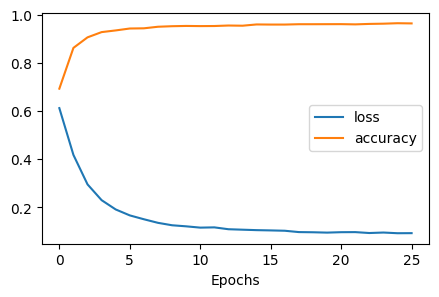

In [ ]:
loss_acc = pd.DataFrame(ann_model.history.history)
loss_acc[['loss', 'accuracy']].plot(figsize=(5,3), xlabel='Epochs')

In [ ]:
#now testing for Test data
y_pred = ann_model.predict(X_test)
#converting values
y_pred = (y_pred>0.5)

50/50 [==============================] - 0s 884us/step


In [ ]:
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print("confusion Matrix:", cm)
print('score is:',score)

confusion Matrix: [[777  12]
 [ 33 749]]
score is: 0.9713558243157224


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       789
           1       0.98      0.96      0.97       782

    accuracy                           0.97      1571
   macro avg       0.97      0.97      0.97      1571
weighted avg       0.97      0.97      0.97      1571



50/50 [==============================] - 0s 3ms/step


Text(0.5, 23.52222222222222, 'Predicted label')

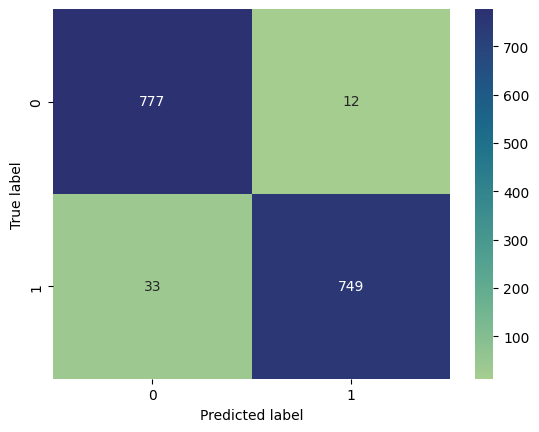

In [ ]:
#plot confusion matrix
#plt.figure(figsize=[10,10])
#sns.heatmap(cm,annot=True)
#plt.show()
y_predict = ann_model.predict(X_test)
cm=confusion_matrix( y_test, np.round(y_predict), labels=[0, 1])

#labels = ['No', 'Yes'];
df_cm = pd.DataFrame(cm)
#counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
#percentages = ["{0:.2%}".format(value) for value in (cm.flatten()/np.sum(cm))]
#labels = [f"{v1}\n{v2}" for v1, v2 in zip(counts, percentages)]
#labels = np.asarray(labels).reshape(2,2)
sns.heatmap(df_cm, cmap='crest', fmt='',annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
Y_Pred = ann_model.predict(X_test)
ann_accuracy = accuracy_score(y_test, np.round(Y_Pred))
ann_recall = recall_score(y_test, np.round(Y_Pred))
ann_precision = precision_score(y_test, np.round(Y_Pred))
ann_f1 = f1_score(y_test, np.round(Y_Pred))
print("Accuracy:",ann_accuracy,"\n Recall:",ann_recall,"\n Precision:", ann_precision,"f1:",ann_f1)

4/4 [==============================] - 0s 2ms/step
Accuracy: 0.9824561403508771 
 Recall: 0.9767441860465116 
 Precision: 0.9767441860465116 
f1: 0.9767441860465116
